SMART PARKING USAGE ANALYSIS

In [8]:
print("Libraries imported")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Libraries imported


In [18]:
parking = pd.read_csv(r"C:\Users\navee\OneDrive\Desktop\HR ANALYTICS\Smart Parking Usage\smart_parking.csv")

In [24]:
print("Top 5 Rows")
parking.head(5)

Top 5 Rows


,parking_id,city_zone,vehicle_type,entry_time,duration_minutes,hourly_rate,total_amount,payment_mode,violation,user_type
0,1,Zone-A,CAR,2024-03-29 06:00:00,240.0,30.0,120.0,Card,N,Visitor
1,2,zone-a,Bike,2024-03-11 06:00:00,15.0,0.0,0.0,UPI,No,regular
2,3,Zone-C,Car,2024-06-05 15:00:00,0.0,40.0,0.0,upi,N,regular
3,4,Zone-A,EV,2024-06-02 05:00:00,NaN,20.0,20.0,upi,No,Visitor
4,5,zone-a,NaN,2024-02-08 13:00:00,5.0,NaN,2.5,CARD,No,NaN


In [37]:
print("Rows & Columns")
parking.shape

Rows & Columns


(12000, 10)

In [48]:
print("Column Names & Data Types")
parking.info()

Column Names & Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   parking_id        12000 non-null  int64  
 1   city_zone         10192 non-null  object 
 2   vehicle_type      10799 non-null  object 
 3   entry_time        11400 non-null  object 
 4   duration_minutes  11661 non-null  float64
 5   hourly_rate       10832 non-null  float64
 6   total_amount      12000 non-null  float64
 7   payment_mode      10110 non-null  object 
 8   violation         10785 non-null  object 
 9   user_type         10847 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 937.6+ KB


In [60]:
print("Missing Values in Columns")
parking.isna().sum()

Missing Values in Columns


parking_id             0
city_zone           1808
vehicle_type        1201
entry_time           600
duration_minutes     339
hourly_rate         1168
total_amount           0
payment_mode        1890
violation           1215
user_type           1153
dtype: int64

In [74]:
print("Statistical Scan")
parking.describe()

Statistical Scan


,parking_id,duration_minutes,hourly_rate,total_amount
count,12000.00000,11661.000000,10832.000000,12000.000000
mean,6000.50000,55.078467,27.004247,25.039637
std,3464.24595,66.799156,12.403399,34.382961
min,1.00000,-30.000000,0.000000,-20.000000
25%,3000.75000,15.000000,20.000000,3.330000
50%,6000.50000,30.000000,30.000000,15.000000
75%,9000.25000,60.000000,40.000000,30.000000
max,12000.00000,240.000000,40.000000,160.000000


In [94]:
print("Unique Values")
print("Unique Vehicle Type")
parking['vehicle_type'].unique()

Unique Values
Unique Vehicle Type


array(['CAR', 'Bike', 'Car', 'EV', nan, 'car'], dtype=object)

In [96]:
print("Unique Payment Mode")
parking['payment_mode'].unique()

Unique Payment Mode


array(['Card', 'UPI', 'upi', 'CARD', 'Cash', nan], dtype=object)

In [98]:
print("Unique Violation")
parking['violation'].unique()

Unique Violation


array(['N', 'No', 'Yes', 'YES', nan, 'Y'], dtype=object)

DATA CLEANING

In [119]:
print("Time Series Corrected")
parking['entry_time'] = pd.to_datetime(parking['entry_time'], errors='coerce')

Time Series Corrected


In [123]:
print("Invalid Time")
parking['entry_time'].isna().sum()

Invalid Time


900

In [133]:
print("Removed Invalid Time")
parking = parking.dropna(subset=['entry_time'])

Removed Invalid Time


Fixing Categorical Columns

In [139]:
parking['city_zone'] = (
    parking['city_zone']
    .str.strip()
    .str.upper()
    .replace({
        'ZONE A': 'ZONE-A',
        'ZONE C': 'ZONE-C',
        '': None
    })
)

In [154]:
parking['city_zone'] = parking['city_zone'].fillna('UNKNOWN')

In [156]:
parking['vehicle_type'] = parking['vehicle_type'].str.upper()

In [160]:
parking['vehicle_type'] = parking['vehicle_type'].fillna('UNKNOWN')

In [162]:
parking['payment_mode'] = parking['payment_mode'].str.upper()

In [164]:
parking['payment_mode'] = parking['payment_mode'].replace('', None)

In [166]:
parking['payment_mode'] = parking['payment_mode'].fillna('UNKNOWN')

In [168]:
parking['violation'] = parking['violation'].str.upper().replace({'Y': 'YES','N': 'NO'})

In [170]:
parking['violation'] = parking['violation'].fillna('NO')

In [172]:
parking['user_type'] = parking['user_type'].str.upper()

In [174]:
parking['user_type'] = parking['user_type'].fillna('UNKNOWN')

Cleaning Numeric Columns

In [188]:
parking = parking[parking['duration_minutes'] > 0]

In [192]:
parking.loc[:,'hourly_rate'] = parking['hourly_rate'].replace(0, None)

In [196]:
parking.loc[:,'hourly_rate'] = parking['hourly_rate'].fillna(parking['hourly_rate'].median())

In [200]:
parking.loc[:,'total_amount'] = (parking['duration_minutes'] / 60) * parking['hourly_rate']

In [204]:
parking.loc[:,'total_amount'] = parking['total_amount'].round(2)

Exploratory Data Analysis

In [227]:
#Distribution of Parking Duration
parking['duration_minutes'].describe()

count    9755.000000
mean       62.945156
std        65.734705
min         5.000000
25%        15.000000
50%        30.000000
75%        60.000000
max       240.000000
Name: duration_minutes, dtype: float64

In [229]:
#Distribution of Total Amount
parking['total_amount'].describe()

count    9755.000000
mean       31.816998
std        35.117066
min         1.670000
25%        10.000000
50%        20.000000
75%        40.000000
max       160.000000
Name: total_amount, dtype: float64

In [254]:
#Frequency Check
parking['duration_minutes'].value_counts().head(5)

duration_minutes
30.0     2515
60.0     2224
15.0     1937
120.0    1330
240.0     884
Name: count, dtype: int64

Categorical Distribution Analysis

In [265]:
#Vehicle Type Distribution
parking['vehicle_type'].value_counts()

vehicle_type
CAR        4341
BIKE       2950
EV         1482
UNKNOWN     982
Name: count, dtype: int64

In [283]:
parking['vehicle_type'].value_counts(normalize=True) * 100

SyntaxError: invalid decimal literal (618541530.py, line 1)

In [285]:
#Payment Mode Analysis
parking['payment_mode'].value_counts()

payment_mode
UPI        3382
CARD       2712
CASH       2125
UNKNOWN    1536
Name: count, dtype: int64

In [296]:
#User Type Segmentation
parking['user_type'].value_counts()

user_type
VISITOR    4464
REGULAR    4373
UNKNOWN     918
Name: count, dtype: int64

In [306]:
#Violation Analysis
parking['violation'].value_counts()

violation
NO     5374
YES    4381
Name: count, dtype: int64

In [308]:
parking['violation'].value_counts(normalize=True) * 100

violation
NO     55.089698
YES    44.910302
Name: proportion, dtype: float64

In [317]:
#City Zone Usage
parking['city_zone'].value_counts()

city_zone
ZONE-A     3842
ZONE-C     2641
ZONE-B     1798
UNKNOWN    1474
Name: count, dtype: int64

Time Based Exploration

In [336]:
parking['hour'] = parking['entry_time'].dt.hour
parking['day'] = parking['entry_time'].dt.day
parking['weekday'] = parking['entry_time'].dt.day_name()
parking['month'] = parking['entry_time'].dt.month_name()

In [340]:
#Peak Hour Analysis
parking['hour'].value_counts().sort_index()

hour
0     422
1     426
2     369
3     379
4     400
5     378
6     387
7     414
8     424
9     400
10    437
11    397
12    385
13    427
14    431
15    439
16    409
17    401
18    411
19    401
20    391
21    399
22    408
23    420
Name: count, dtype: int64

In [342]:
#Weekday vs Weekend Analysis
parking['weekday'].value_counts()

weekday
Monday       1435
Thursday     1432
Saturday     1410
Friday       1380
Wednesday    1380
Tuesday      1364
Sunday       1354
Name: count, dtype: int64

In [355]:
#Monthly Trend Analysis
parking['month'].value_counts()

month
May         1496
March       1438
April       1423
January     1406
June        1396
February    1336
July        1260
Name: count, dtype: int64

In [366]:
#Revenue by Hour
parking.groupby('hour')['total_amount'].sum()

hour
0     13319.96
1     14166.66
2     10832.49
3     12634.14
4     12212.49
5     11983.34
6     13165.84
7     13543.33
8     12986.65
9     13069.16
10    12748.34
11    12902.48
12    12685.01
13    13235.00
14    14310.00
15    13680.84
16    12094.16
17    12875.01
18    13546.67
19    12424.18
20    12690.79
21    12958.31
22    13501.65
23    12808.32
Name: total_amount, dtype: float64

Revenue & Usage Relationship Analysis

In [395]:
#Duration vs Revenue Relationship
parking[['duration_minutes', 'total_amount']].corr()

,duration_minutes,total_amount
duration_minutes,1.000000,0.945837
total_amount,0.945837,1.000000


In [397]:
#Average Revenue by Vehicle Type
parking.groupby('vehicle_type')['total_amount'].mean()

vehicle_type
BIKE       31.429915
CAR        32.214918
EV         31.037996
UNKNOWN    32.396436
Name: total_amount, dtype: float64

In [399]:
#Total Revenue Contribution by Vehicle Type
parking.groupby('vehicle_type')['total_amount'].sum()

vehicle_type
BIKE        92718.25
CAR        139844.96
EV          45998.31
UNKNOWN     31813.30
Name: total_amount, dtype: float64

In [401]:
#Revenue by User Type
parking.groupby('user_type')['total_amount'].agg(['mean', 'sum', 'count'])

,mean,sum,count
user_type,,,
REGULAR,30.973000,135444.93,4373
UNKNOWN,32.922941,30223.26,918
VISITOR,32.416360,144706.63,4464


In [411]:
#Revenue Impact of Violations
parking.groupby('violation')['total_amount'].mean()

violation
NO     31.856141
YES    31.768984
Name: total_amount, dtype: float64

Visualization

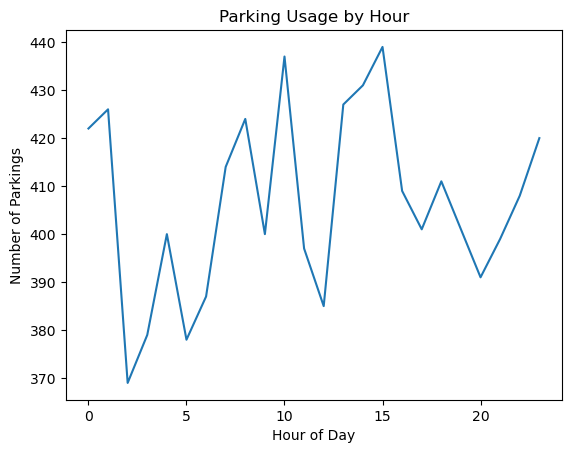

In [441]:
#Peak Parking Hours
hourly_counts = parking['hour'].value_counts().sort_index()

plt.figure()
plt.plot(hourly_counts.index, hourly_counts.values)
plt.title("Parking Usage by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Parkings")

plt.savefig(r"C:\Users\navee\OneDrive\Desktop\HR ANALYTICS\Smart Parking Usage\parking_usage_by_hour.png", bbox_inches="tight")
plt.show()

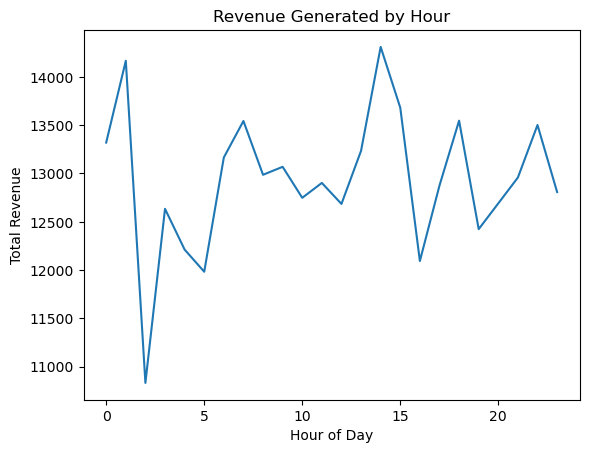

In [443]:
#Revenue by Hour
hourly_revenue = parking.groupby('hour')['total_amount'].sum()

plt.figure()
plt.plot(hourly_revenue.index, hourly_revenue.values)
plt.title("Revenue Generated by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Total Revenue")

plt.savefig(r"C:\Users\navee\OneDrive\Desktop\HR ANALYTICS\Smart Parking Usage\revenue_by_hour.png", bbox_inches="tight")
plt.show()

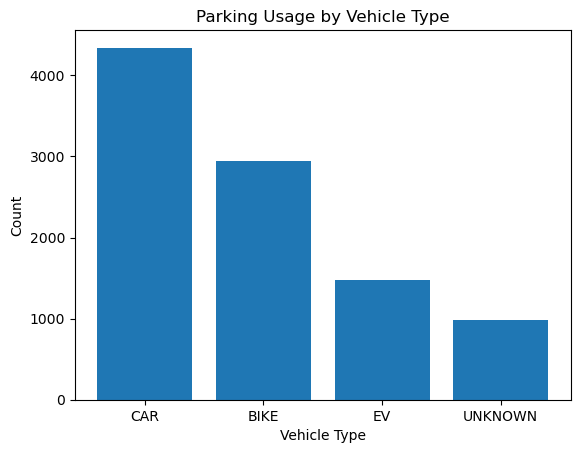

In [445]:
#Parking Usage by Vehicle Type
vehicle_counts = parking['vehicle_type'].value_counts()

plt.figure()
plt.bar(vehicle_counts.index, vehicle_counts.values)
plt.title("Parking Usage by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")

plt.savefig(r"C:\Users\navee\OneDrive\Desktop\HR ANALYTICS\Smart Parking Usage\usage_by_vehicle_type.png", bbox_inches="tight")
plt.show()

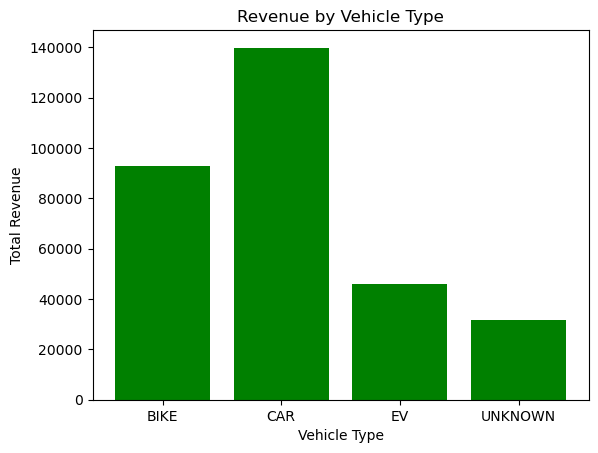

In [447]:
#Revenue by Vehicle Type
vehicle_revenue = parking.groupby('vehicle_type')['total_amount'].sum()

plt.figure()
plt.bar(vehicle_revenue.index, vehicle_revenue.values, color='green')
plt.title("Revenue by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Revenue")

plt.savefig(r"C:\Users\navee\OneDrive\Desktop\HR ANALYTICS\Smart Parking Usage\revenue_by_vehicle_type.png", bbox_inches="tight")
plt.show()

In [453]:
print("Sucessfully Saved!")
parking.to_csv(r"C:\Users\navee\OneDrive\Desktop\HR ANALYTICS\Smart Parking Usage\cleanedd_smart_parking.csv", index=False)

Sucessfully Saved!
